### Description

> Data From : https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

<br>


![image](https://github.com/Jongwon0280/EDA-Study-and-Kaggle-Lab/assets/56438131/6c108b62-2f86-4380-90dc-3ecc6ce38108)![image](https://github.com/Jongwon0280/EDA-Study-and-Kaggle-Lab/assets/56438131/24d3e834-b5a1-491d-ad07-c70cbfe5bb2e)


수집된 데이터에는 25세에서 75세 사이의 여성을 대상으로 한 유방 초음파 이미지가 포함됩니다. 이 자료는 2018년에 수집되었습니다. 환자 수는 600명의 여성 환자입니다. 데이터 세트는 평균 이미지 크기가 500*500픽셀인 780개의 이미지로 구성됩니다. 이미지는 PNG 형식입니다. 실측 영상은 원본 영상과 함께 제공됩니다. 영상은 정상, 양성 및 악성의 세 가지 클래스로 분류됩니다.

<br>

이 데이터를 통해, (정상,양성,악성)을 분류하는 것이 아닌 부분 마스킹되어있는 종양의 위치들을 통해 실제 존재할 것 같은 종양의 위치 및 부분 마스킹되어있는 종양의 위치를 찾습니다. U-NET에서 VGGnet의 구조를 이용하여 학습합니다. 

<br>

> **1. 데이터 수집 및 시각화**

url패턴 매칭을 통해 이미지와 그에 해당하는 마스크를 zip합니다.

![image](https://github.com/Jongwon0280/EDA-Study-and-Kaggle-Lab/assets/56438131/642de110-8091-42c1-b1b8-be19ee71fe36)



<br>

> **2. 데이터 전처리**

train과 test 이미지를 128x128로 resizing 및 grayscale로 변환합니다.

<br>


> **3. 데이터 증강**

Generator를 통해 이미지 및 마스크에 회전, 확대 등 데이터를 증강하였습니다.

검증을 위한 valid 셋에는 증강처리를 하지 않았습니다.


<br>


> **4. 데이터 모델링**

U-Net의 기본구조를 통해 모델링 하였습니다. 

loss는 dice-coef를 사용하였으며, metric으로 binary-acc, iou-score를 선정하였으며 batch-size : 10 , epochs : 100을 사용하였습니다.

<br>

> **아키텍처**

![image](https://github.com/Jongwon0280/EDA-Study-and-Kaggle-Lab/assets/56438131/d37c0c03-8987-4751-aee8-d00dc4e85417)

<br>


> **5. TEST 성능평가**

모델의 metric인 binary-acc, iou-score에 대해 train, validation을 비교하였으며,
TEST의 전처리를 거쳐 predict 시켜 임계값 0.5로 지정하여 0,1로 라벨화 시켰으며 모델이 생성한 마스크와 정답 마스크를 시각화 하였습니다.

<br>

![image](https://github.com/Jongwon0280/EDA-Study-and-Kaggle-Lab/assets/56438131/b031fe8b-7ab1-4aee-a56b-9011c0fb876c)


<br>

> **결과값**

    Mean IoU = 0.7438096

    Precision Score = 0.592

    Recall Score = 0.848

    F1 Score = 0.697

<br>

> **생성마스크**

![image](https://github.com/Jongwon0280/EDA-Study-and-Kaggle-Lab/assets/56438131/4f44a147-b0e5-4678-8557-83b196d0eccc)

> ### **라이브러리**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from cv2 import imread,imshow,resize

import re
import math

> ### **데이터 수집 및 간단한 시각화**

In [ ]:

BASE_PATH='/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/'


img_list =[]
mask_list=[]
diagnosis_list=[]
digId_list=[]


benign =[]
mali=[]
norm=[]
NAME = ['benign','malignant','normal']

for name,ls in zip(NAME,[benign,mali,norm]):
    BASE_DIR=os.path.join(BASE_PATH, name)
    ls += glob(os.path.join(BASE_DIR,"*).png"))

    mask_list += [os.path.join(BASE_DIR,os.path.basename(i).rsplit(".",1)[0]+'_mask.png') for i in ls]

    diagnosis_list += [i.rsplit("/")[5] for i in ls]
    digId_list.append( [re.findall(r'\d+', i.rsplit("/",1)[-1]) for i in ls])


img_list=benign + mali + norm
    


In [ ]:
from itertools import chain

digId_list = list(chain.from_iterable(chain.from_iterable(digId_list)))


Text(0.5, 1.0, 'Diagnosis Count')

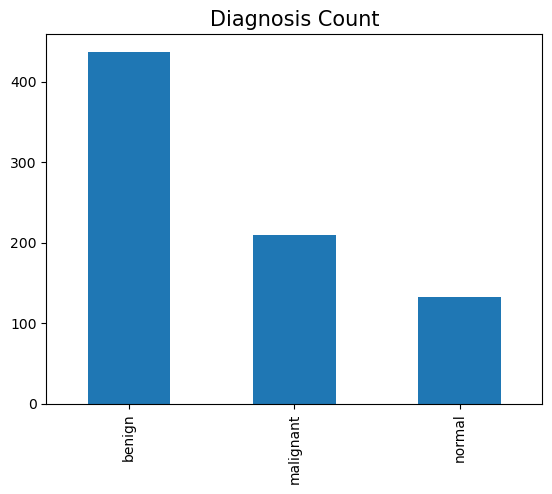

In [ ]:
pd.DataFrame({"img_dir": img_list, "mask_dir" : mask_list,"diagnosis" : diagnosis_list,"digId" : digId_list} )['diagnosis'].value_counts().plot(kind='bar')

plt.title('Diagnosis Count',fontsize="15")

In [ ]:
df=pd.DataFrame({"img_dir": img_list, "mask_dir" : mask_list,"diagnosis" : diagnosis_list,"digId" : digId_list})
df.head()

,img_dir,mask_dir,diagnosis,digId
0,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,2
1,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,285
2,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,300
3,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,390
4,/kaggle/input/breast-ultrasound-images-dataset...,/kaggle/input/breast-ultrasound-images-dataset...,benign,357


> **샘플이미지**

/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (2).png


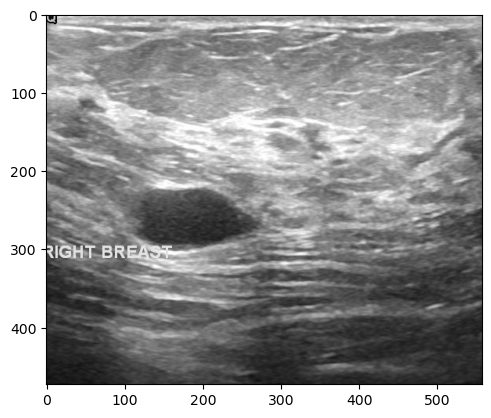

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img


print(img_list[0])
file_img = img_list[0]

file_img=img.imread(file_img)
plt.imshow(file_img)


> **샘플마스크**

/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (2)_mask.png


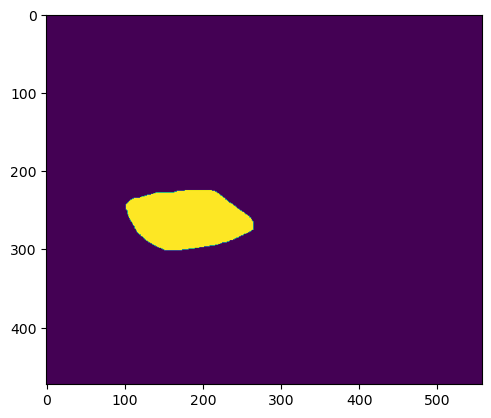

In [ ]:

print(mask_list[0])
file_img = mask_list[0]

file_img=img.imread(file_img)
plt.imshow(file_img)

> ### **데이터 전처리( 데이터 분리 및 전처리)**

In [ ]:
import random
from sklearn.model_selection import train_test_split

random.seed(2023)

img_mask_tuples = list(zip(img_list, mask_list))

random.shuffle(img_mask_tuples)

train_tuples, test_tuples = train_test_split(img_mask_tuples,test_size=0.2)

In [ ]:
IMG_HEIGHT =  128
IMG_WIDTH = 128
IMG_CHANNELS = 1

X_train = np.zeros((len(train_tuples), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_tuples), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
X_test = np.zeros((len(test_tuples), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_tuples), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

In [ ]:
len(train_tuples)

624

In [ ]:
# X_train
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for i, image_id in enumerate(train_tuples):
    

    image = imread(image_id[0])

    image = rgb2gray(image)
    

    image = resize(image, (IMG_HEIGHT, IMG_WIDTH))
    
    
    image = np.expand_dims(image, axis=-1)
    

    X_train[i] = image
    
    mask = imread(image_id[1])
    mask = rgb2gray(mask)
    

    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH))
    
    
    mask = np.expand_dims(mask, axis=-1)
    
   
    Y_train[i] = (mask/255 >= 0.5).astype(int)
    
print(X_train.shape)
print(Y_train.shape)

(624, 128, 128, 1)
(624, 128, 128, 1)


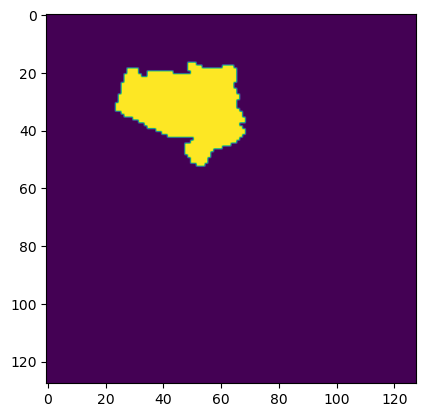

In [ ]:
plt.imshow(Y_train[1])

In [ ]:
# X_test
for i, image_id in enumerate(test_tuples):
    

    image = imread(image_id[0])
    image = rgb2gray(image)
    

    image = resize(image, (IMG_HEIGHT, IMG_WIDTH))
    
 
    image = np.expand_dims(image, axis=-1)
    

    X_test[i] = image
    

    mask = imread(image_id[1])
    mask = rgb2gray(mask)
    
    
    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH))
    
  
    mask = np.expand_dims(mask, axis=-1)
    
    
    Y_test[i] = (mask/255 >= 0.5).astype(int)
    
print(X_test.shape)
print(Y_test.shape)

(156, 128, 128, 1)
(156, 128, 128, 1)


> ### **데이터 증강**

In [ ]:
x_train,x_valid,y_train,y_valid=train_test_split(X_train,Y_train,test_size=.2,shuffle=True,random_state=1)

In [ ]:
def adjust_data(img,mask):
    img = img / 255
    
    # 이미 mask에 대해선 이작업을 수행했기 때문이다.
    #mask = mask / 255
    #mask[mask > 0.5] = 1
    #mask[mask <= 0.5] = 0
    
    return (img, mask)

In [ ]:



from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 10

def train_geneartor(x,y, batch_size, aug_dict,seed=1):
    image_datagen=ImageDataGenerator(**aug_dict)
    mask_datagen=ImageDataGenerator(**aug_dict)
    
    image_generator = image_datagen.flow(x,batch_size=batch_size,shuffle=True, seed=1,
       )
    mask_generator = image_datagen.flow(y,batch_size=batch_size, shuffle=True,seed=1
        )
    
    
    train_gen = zip(image_generator, mask_generator)
    
    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        
        
        yield (img,mask) #for문을 잠시 중단하고 (img,mask)를 return해주고 다시 복귀한다.
    
    

train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest'
                           )



train_gen=train_geneartor(x_train,y_train,BATCH_SIZE,train_generator_args)
valid_gen=train_geneartor(x_valid,y_valid,BATCH_SIZE,dict())



/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

> ### **데이터모델링**

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
smooth =100

# 영상에서 말씀해주신 캐글의 코드를 참고하였습니다.
def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac
def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [ ]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))


c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (inputs)
#c1 = BatchNormalization()(c1)
#c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
#c1 = BatchNormalization()(c1)
#c1 = Dropout(0.1) (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
c2 = BatchNormalization()(c2)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
#c2 = BatchNormalization()(c2)
#c2 = Dropout(0.1) (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
#c3 = BatchNormalization()(c3)
#c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
#c3 = BatchNormalization()(c3)
#c3 = Dropout(0.2) (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
#c4 = BatchNormalization()(c4)
#c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)
#c4 = BatchNormalization()(c4)
#c4 = Dropout(0.2) (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
#c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
#c6 = BatchNormalization()(c6)
#c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)
#c6 = Dropout(0.2) (c6)
#c6 = BatchNormalization()(c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
#c7 = BatchNormalization()(c7)
#c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)
#c7 = BatchNormalization()(c7)
#c7 = Dropout(0.2) (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
#c8 = BatchNormalization()(c8)
#c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)
#c8 = BatchNormalization()(c8)
#c8 = Dropout(0.1) (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
#c9 = BatchNormalization()(c9)
#c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)
#c9 = BatchNormalization()(c9)
#c9 = Dropout(0.1) (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])

optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer, loss=dice_coef_loss,metrics=['binary_accuracy',iou])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 16  2320        ['conv2d[0][0]']                 
                                )                                                             

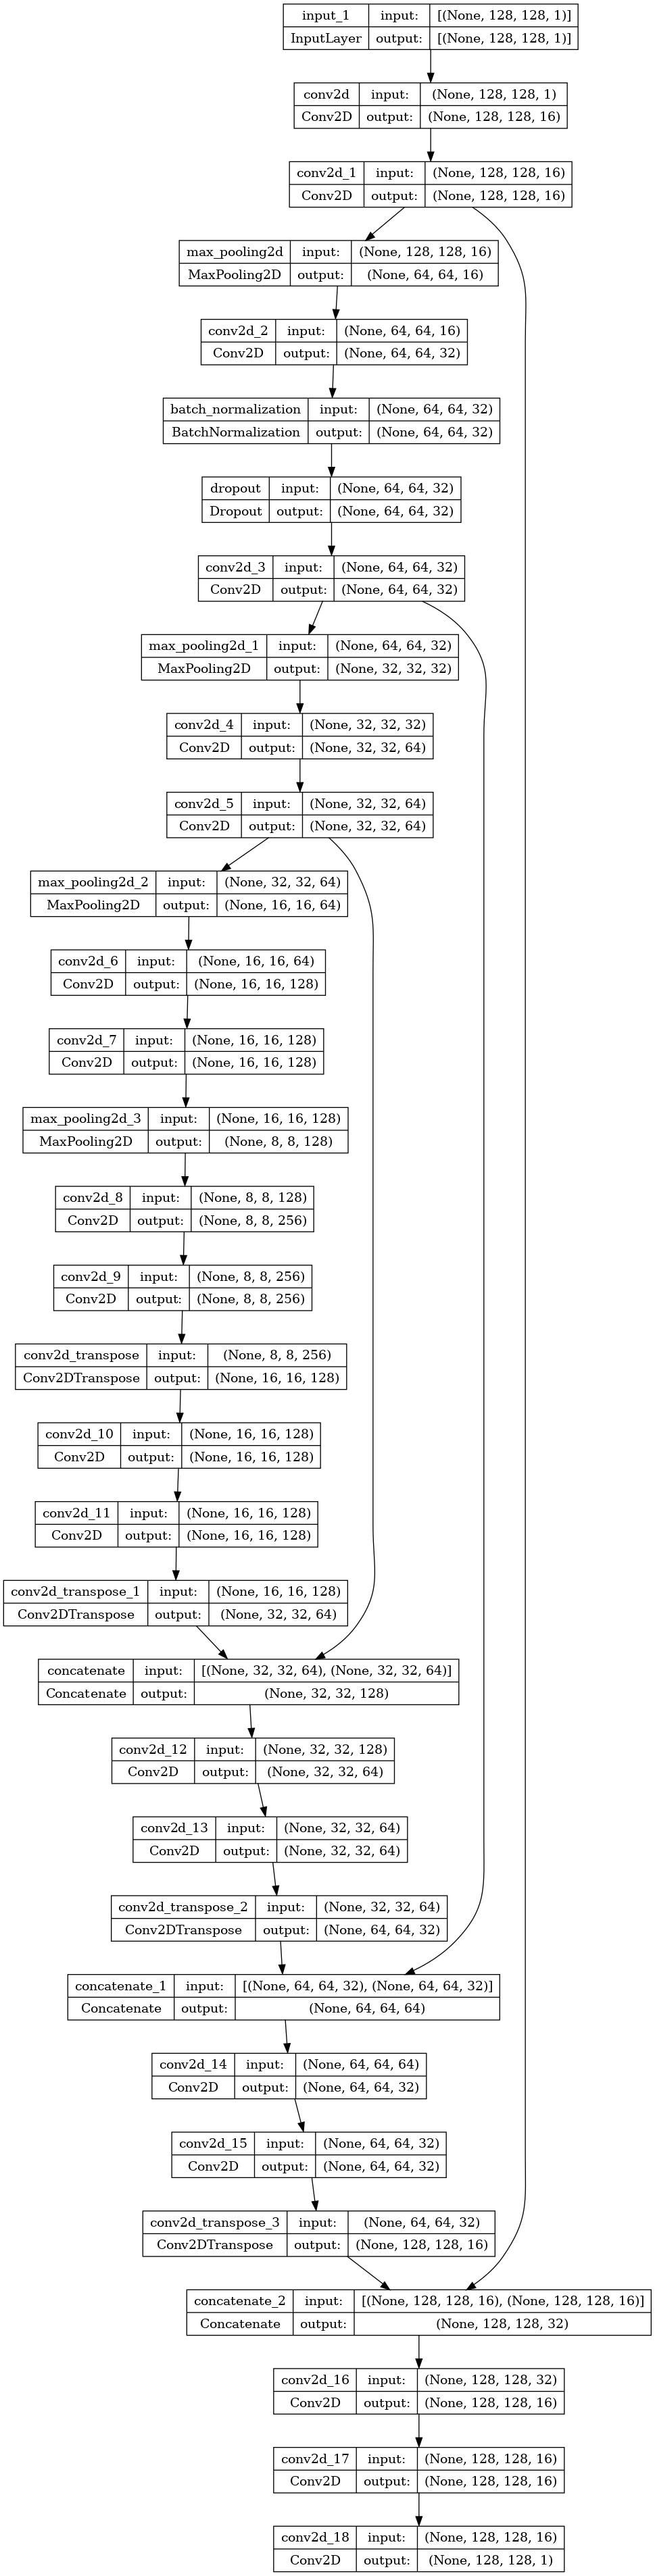

In [ ]:
from IPython.display import Image
tf.keras.utils.plot_model(model, to_file='unet_model.png', show_shapes=True)
Image("unet_model.png")

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping



rlr_cb = ReduceLROnPlateau(monitor='val_iou', factor=0.5, patience=5, mode='max', verbose=1)
ely_cb = EarlyStopping(monitor='val_iou', patience=20, mode='max', verbose=1)

callbacks_list = [rlr_cb ,ely_cb]

history = model.fit(train_gen,
                 steps_per_epoch=len(x_train)//BATCH_SIZE,
                    batch_size=BATCH_SIZE,validation_data=valid_gen,validation_steps=len(x_valid)//BATCH_SIZE, epochs=100, callbacks=callbacks_list)

Epoch 1/100


2023-05-27 13:52:43.133634: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


49/49 [==============================] - 18s 46ms/step - loss: 0.8308 - binary_accuracy: 0.7779 - iou: 0.0951 - val_loss: 0.8646 - val_binary_accuracy: 0.9283 - val_iou: 0.0751 - lr: 1.0000e-04
Epoch 2/100
49/49 [==============================] - 3s 51ms/step - loss: 0.6473 - binary_accuracy: 0.8539 - iou: 0.2220 - val_loss: 0.5654 - val_binary_accuracy: 0.9275 - val_iou: 0.2821 - lr: 1.0000e-04
Epoch 3/100
49/49 [==============================] - 2s 39ms/step - loss: 0.5342 - binary_accuracy: 0.9144 - iou: 0.3149 - val_loss: 0.5826 - val_binary_accuracy: 0.9385 - val_iou: 0.2739 - lr: 1.0000e-04
Epoch 4/100
49/49 [==============================] - 2s 40ms/step - loss: 0.4440 - binary_accuracy: 0.9333 - iou: 0.3965 - val_loss: 0.4732 - val_binary_accuracy: 0.9246 - val_iou: 0.3660 - lr: 1.0000e-04
Epoch 5/100
49/49 [==============================] - 2s 37ms/step - loss: 0.4270 - binary_accuracy: 0.9351 - iou: 0.4158 - val_loss: 0.4805 - val_binary_accuracy: 0.9265 - val_iou: 0.3631 - l

> **test셋의 전처리**

In [ ]:
X_test = X_test/255

X_test

> ### **TEST 성능평가**

In [ ]:



test_preds = model.predict(X_test)


preds_test_thresh = (test_preds >= 0.5).astype(np.uint8)


5/5 [==============================] - 0s 9ms/step


In [ ]:

plt.figure(figsize=(30,30))
plt.axis('Off')




for i in range(0,len(X_test)):

    # image
    if i == 12 :
        break
    
    plt.subplot(12,3,i*3+1)
    test_image = X_test[i, :, :,0]
    plt.imshow(test_image,cmap='gray')
    plt.title('Test Image', fontsize=14)
    plt.axis('off')


    # true mask
    plt.subplot(12,3,i*3+2)
    mask_image = Y_test[i, :, :,0]*255
    plt.imshow(mask_image, cmap='gray')
    plt.title('True Mask', fontsize=14)
    plt.axis('off')

    # predicted mask
    plt.subplot(12,3,i*3+3)
    test_mask = preds_test_thresh[i, :, :,0]*255
    plt.imshow(test_mask, cmap='gray')
    plt.title('Pred Mask', fontsize=14)
    plt.axis('off')



plt.tight_layout()
plt.show()

(array([[128.,   0.,   0., ...,   0.,   0.,   0.],
        [128.,   0.,   0., ...,   0.,   0.,   0.],
        [128.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [128.,   0.,   0., ...,   0.,   0.,   0.],
        [128.,   0.,   0., ...,   0.,   0.,   0.],
        [128.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([1.30799666e-24, 1.00000001e-01, 2.00000003e-01, 3.00000012e-01,
        4.00000006e-01, 5.00000000e-01, 6.00000024e-01, 6.99999988e-01,
        8.00000012e-01, 8.99999976e-01, 1.00000000e+00]),
 <a list of 128 BarContainer objects>)

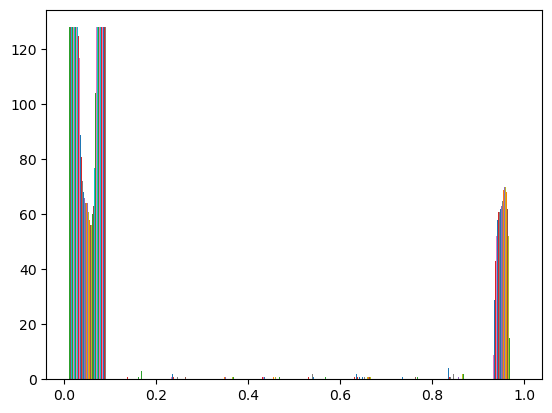

In [ ]:
plt.hist(test_preds[0, :, :,0])

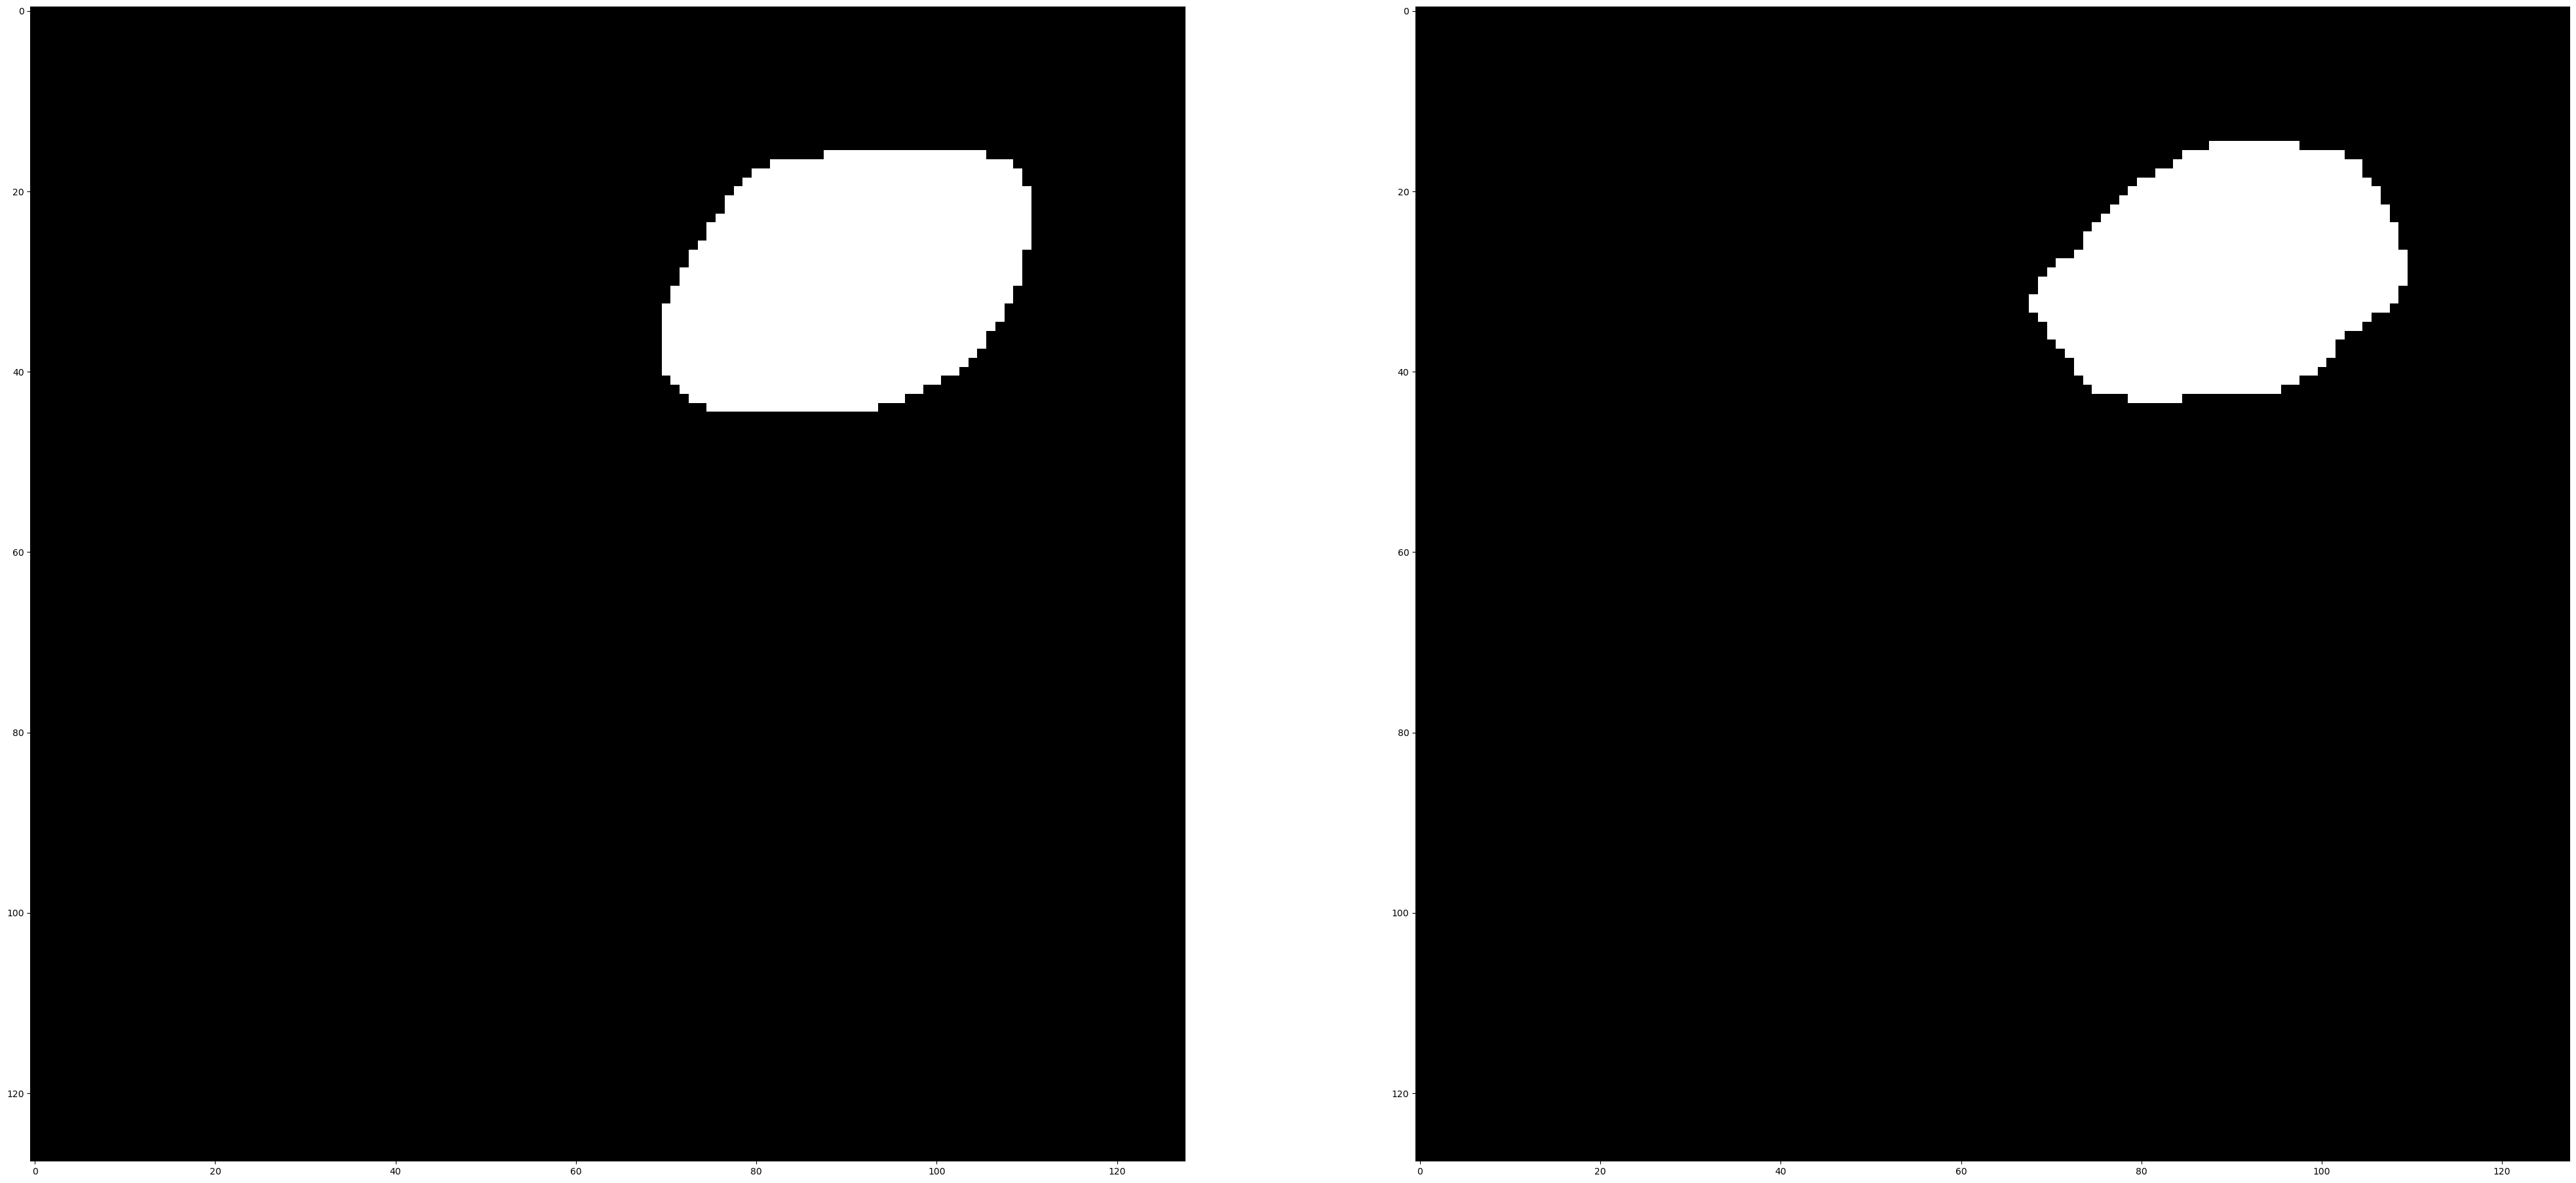

In [ ]:
plt.figure(figsize=(50,50))
i=2
plt.subplot(1,2,1)
mask_image = Y_test[i, :, :,0]*255
plt.imshow(mask_image, cmap='gray')
plt.subplot(1,2,2)
test_mask = preds_test_thresh[i, :, :,0]*255
plt.imshow(test_mask, cmap='gray')

In [ ]:
import seaborn as sns

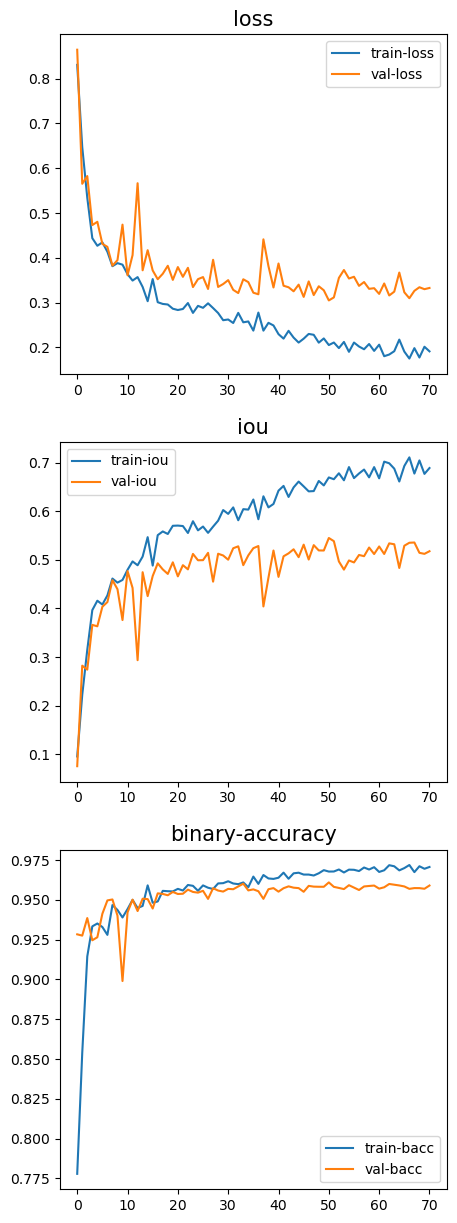

In [ ]:


fig,axes=plt.subplots(3,1,figsize=(5,15))

sns.lineplot(history.history['loss'],ax=axes[0],label='train-loss')
sns.lineplot(history.history['val_loss'],ax=axes[0],label='val-loss')
axes[0].set_title('loss',fontsize=15)
plt.legend()


sns.lineplot(history.history['iou'],ax=axes[1],label='train-iou')
sns.lineplot(history.history['val_iou'],ax=axes[1],label='val-iou')
axes[1].set_title('iou',fontsize=15)
plt.legend()


sns.lineplot(history.history['binary_accuracy'],ax=axes[2],label='train-bacc')
sns.lineplot(history.history['val_binary_accuracy'],ax=axes[2],label='val-bacc')
axes[2].set_title('binary-accuracy',fontsize=15)
plt.legend()



In [ ]:
import tensorflow.keras.metrics as tm


print(f'\033[93m')
y_pred=model.predict(X_test,verbose=0)
y_pred_thresholded = y_pred > 0.5


IOU_keras = tm.MeanIoU(num_classes=2)
IOU_keras.update_state(y_pred_thresholded, Y_test)
print("Mean IoU =", IOU_keras.result().numpy())

prec_score = tm.Precision()
prec_score.update_state(y_pred_thresholded, Y_test)
p = prec_score.result().numpy()
print('Precision Score = %.3f' % p)

recall_score = tm.Recall()
recall_score.update_state(y_pred_thresholded, Y_test)
r = recall_score.result().numpy()
print('Recall Score = %.3f' % r)

f1_score = 2*(p*r)/(p+r)
print('F1 Score = %.3f' % f1_score)



Mean IoU = 0.7438096
Precision Score = 0.592
Recall Score = 0.848
F1 Score = 0.697
